### Install and Import Third Party Dependencies

In [1]:
%pip install pandas numpy matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Initialize datasets and columns for outlier detection

In [ ]:
# Load dataset (update the file path if needed)
df = pd.read_csv("data.csv")

# Select numeric columns for outlier detection
df_numeric = df.select_dtypes(include='number')

# Display dataset info and summary
print(df.info())
print(df.describe())

# Selecting numeric columns
df_numeric = df.select_dtypes(include='number')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20877 entries, 0 to 20876
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               20225 non-null  object 
 1   type                20877 non-null  object 
 2   genres              20530 non-null  object 
 3   releaseYear         20842 non-null  float64
 4   imdbId              19356 non-null  object 
 5   imdbAverageRating   19166 non-null  float64
 6   imdbNumVotes        19166 non-null  float64
 7   availableCountries  166 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB
None
        releaseYear  imdbAverageRating  imdbNumVotes
count  20842.000000       19166.000000  1.916600e+04
mean    2013.250744           6.395393  3.169231e+04
std       14.315295           1.094817  1.202100e+05
min     1913.000000           1.200000  5.000000e+00
25%     2012.000000           5.700000  3.262500e+02
50%     2018.000000        

### Outliers Detected using Z-score

In [ ]:
z_scores = np.abs(zscore(df_numeric))
z_threshold = 3
outliers_z = (z_scores > z_threshold)
df_outliers_z = df[outliers_z.any(axis=1)]

print("\nOutliers detected using Z-score:")
print(df_outliers_z)

### Outliers Detected using IQR

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for imdbNumVotes
Q1 = df_numeric['imdbNumVotes'].quantile(0.25)
Q3 = df_numeric['imdbNumVotes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries as scalar values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_numeric['is_outlier'] = (df_numeric['imdbNumVotes'] < lower_bound) | (df_numeric['imdbNumVotes'] > upper_bound)

# Extract rows with outliers
df_outliers_iqr = df[df_numeric['is_outlier']]

print("\nOutliers detected using IQR:")
print(df_outliers_iqr)


Outliers detected using IQR:
                             title   type                     genres  \
0                  American Beauty  movie                      Drama   
1                The Fifth Element  movie  Action, Adventure, Sci-Fi   
2                Kill Bill: Vol. 1  movie    Action, Crime, Thriller   
3                          Jarhead  movie      Biography, Drama, War   
4                       Unforgiven  movie             Drama, Western   
...                            ...    ...                        ...   
20384                Baby Reindeer     tv           Biography, Drama   
20457          A Man on the Inside     tv              Comedy, Crime   
20496  The Great Indian Kapil Show     tv          Comedy, Talk-Show   
20544            Nobody Wants This     tv            Comedy, Romance   
20588         When the Phone Rings     tv    Drama, Mystery, Romance   

       releaseYear      imdbId  imdbAverageRating  imdbNumVotes  \
0           1999.0   tt0169547        

### Data Visualization of Outlier

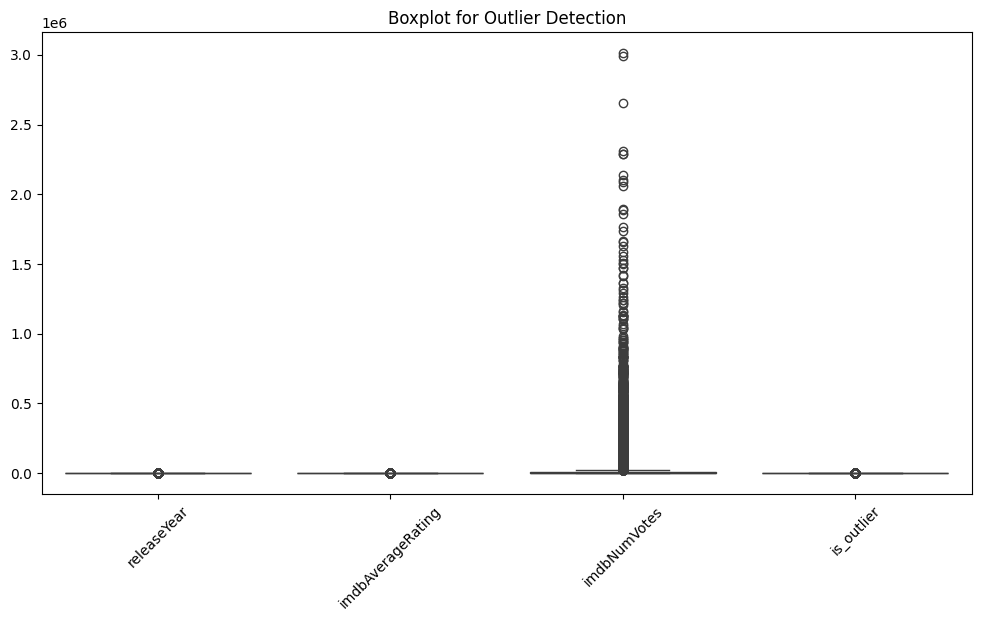

TypeError: text() missing 1 required positional argument: 's'

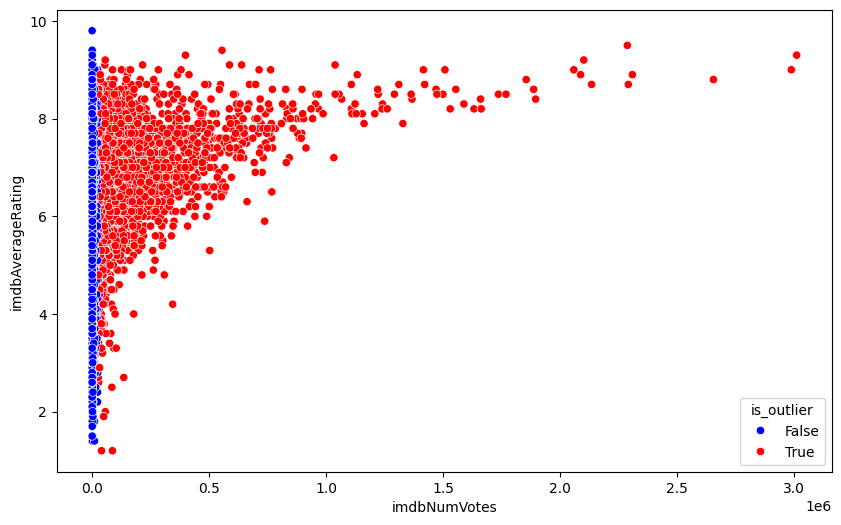

In [12]:
# Boxplot Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Scatter Plot with Outliers Highlighted
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_numeric,
    x='imdbNumVotes', y='imdbAverageRating',
    hue='is_outlier',  # Color by outlier status
    palette={True: 'red', False: 'blue'},  # Red for outliers, blue for non-outliers
    legend='brief'
)

# Highlight outliers with annotations
for i in range(len(df_numeric)):
    if df_numeric['is_outlier'].iloc[i]:
        plt.text(
            df_numeric['imdbNumVotes'].iloc[i],
            df_numeric['imdbAverageRating'].iloc[i],
            fontsize=9,
            ha='right'
        )

plt.title('IMDb Ratings vs. Number of Votes (Outliers Highlighted)')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.legend(title='Outlier', labels=['No', 'Yes'])
plt.show()